# Humanitarian Plans EDA

In [138]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
#import data
human_needs = pd.read_csv("../../Data/Raw Data.csv")


In [140]:
#view first 5 rows of your data
human_needs.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [141]:
#Changing the data type of appeal to a str

human_needs["Appeal Type"].astype(str).replace(r'[\r\n\t]', '', regex=True)



0          Consolidated Appeal Process (CAP)
1          Consolidated Appeal Process (CAP)
2          Consolidated Appeal Process (CAP)
3          Consolidated Appeal Process (CAP)
4          Consolidated Appeal Process (CAP)
5          Consolidated Appeal Process (CAP)
6          Consolidated Appeal Process (CAP)
7                                        nan
8                                        nan
9                                        nan
10                                       nan
11                                       nan
12                                       nan
13                                       nan
14                                       nan
15                                       nan
16          Humanitarian Response Plan (HRP)
17          Humanitarian Response Plan (HRP)
18          Humanitarian Response Plan (HRP)
19          Humanitarian Response Plan (HRP)
20          Humanitarian Response Plan (HRP)
21          Humanitarian Response Plan (HRP)
22        

In [142]:
#Changing the data type of Value to a integer
human_needs["Value"] = human_needs["Value"].astype(str).str.replace(",", "").astype(int)
print(human_needs)



      Year                                               Plan  \
0     2010                                        Afghanistan   
1     2010                                        Afghanistan   
2     2010                                        Afghanistan   
3     2010                                        Afghanistan   
4     2010                                        Afghanistan   
5     2010                                        Afghanistan   
6     2010                                        Afghanistan   
7     2010                                        Afghanistan   
8     2010                                        Afghanistan   
9     2010                                        Afghanistan   
10    2010                                        Afghanistan   
11    2010                                        Afghanistan   
12    2010                                        Afghanistan   
13    2010                                        Afghanistan   
14    2010               

In [143]:
human_needs.dtypes


Year                      int64
Plan                     object
Crisis Country           object
Country Code             object
Metric                   object
Value                     int64
Standardised Plan        object
Appeal Type              object
PiN Value for Dataviz    object
OUSG Metric              object
dtype: object

In [144]:
#Describe
human_needs.describe()

,Year,Value
count,1259,1259
mean,2017,400002039
std,4,809940113
min,2010,0
25%,2014,5751249
50%,2017,74500000
75%,2021,432400000
max,2024,6080899576


In [145]:
#TODO: display the null values in your dataframe
human_needs.isna().sum()

Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
dtype: int64

In [146]:
#Dropping the null values 
human_needs = human_needs.drop(columns= ["PiN Value for Dataviz", "OUSG Metric"] )
human_needs = human_needs.dropna(subset=['Appeal Type'])


In [164]:
#Adding a new column with a function (appeal_plans): 
#Appeal types: 'Humanitarian Response Plan (HRP)', 'Flash Appeal (FA)', 'Non Humanitarian Response Plan', 
#'COVID-19', 'COVID-19 (Intersectoral)', Regional Refugee Response Plan (RRP) , "other"

#convert the series to lowercase first
human_needs['Appeal Type'] = human_needs['Appeal Type'].str.lower()
human_needs

#assigning method (str.startswith()) to variable and 
#using if statements to check if the string values in human_needs start with a specfic subset of letters, 
#then the new value will shows a consolidated name 

def appeal_plans(plan: str):
    if plan.startswith("f"): 
        return 'Flash Appeal (FA)'
    elif plan.endswith('al)'):
        return 'COVID-19 (Intersectoral)'
    #elif plan.endswith('d-19)'):
    elif plan.startswith("cov"):
        return 'COVID-19'
    elif plan.startswith("c"):
        return "Consolidated Appeal Process (CAP)"
    elif plan.startswith("non"):
        return 'Non Humanitarian Response Plan'
    elif plan.startswith("hrp") or plan.startswith("humanitarian"):
        return 'Humanitarian Response Plan (HRP)'
    elif plan.startswith('other'):
        return 'Other'
    elif plan.startswith("r"):
        return "Regional Refugee Response Plan (RRP)"
    else: 
        return None

    

        
#making a new column "Modified Appeal Type" by applying a function   
human_needs["Modified Appeal Type"] = human_needs['Appeal Type'].apply(appeal_plans)
#human_needs


/var/folders/q6/zhddk2010yzdxh2b2q3wtwdw0000gp/T/ipykernel_64200/1972210147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_needs['Appeal Type'] = human_needs['Appeal Type'].str.lower()
/var/folders/q6/zhddk2010yzdxh2b2q3wtwdw0000gp/T/ipykernel_64200/1972210147.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_needs["Modified Appeal Type"] = human_needs['Appeal Type'].apply(appeal_plans)


In [148]:
human_needs['Modified Appeal Type'].unique()

array(['Consolidated Appeal Process (CAP)',
       'Humanitarian Response Plan (HRP)', 'Other',
       'COVID-19 (Intersectoral)', 'COVID-19',
       'Regional Refugee Response Plan (RRP)', 'Flash Appeal (FA)',
       'Non Humanitarian Response Plan'], dtype=object)

In [149]:
#Group the years and counting the total modified appeal types per year
year_data = human_needs.groupby(by= "Year")
appeal_type_counts_year = year_data["Modified Appeal Type"].count()
appeal_type_counts_year

Year
2010    35
2011    42
2012    47
2013    42
2014    53
2015    76
2016    67
2017    77
2018    66
2019    63
2020    78
2021    72
2022    92
2023    92
2024    72
Name: Modified Appeal Type, dtype: int64

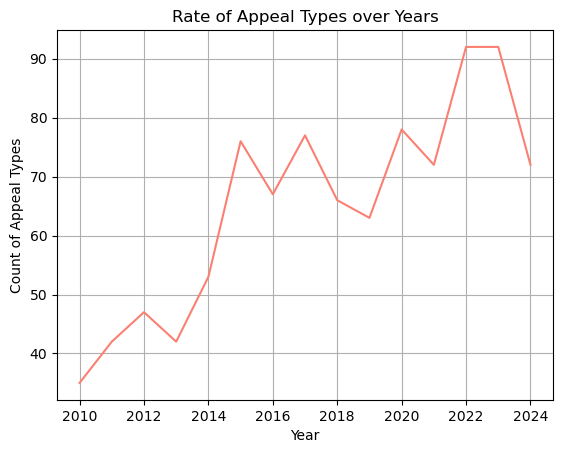

In [182]:
#plotting the total modified appeal types per year

appeal_type_counts_year.plot.line(x= "year", color = "salmon")

plt.xlabel('Year')
plt.ylabel('Count of Appeal Types')
plt.title('Rate of Appeal Types over Years')
plt.grid(True)
plt.show()

In [151]:
#count the frequency of unique values per year in the "Modified Appeal Type" column and save this value into a new dataframe named "appeal_counts"
appeal_counts = year_data["Modified Appeal Type"].value_counts().to_frame('Count').reset_index().rename(columns={'index': 'Value'})
appeal_counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(appeal_counts)

    Year                  Modified Appeal Type  Count
0   2010     Consolidated Appeal Process (CAP)     15
1   2010      Humanitarian Response Plan (HRP)     12
2   2010                                 Other      8
3   2011      Humanitarian Response Plan (HRP)     17
4   2011  Regional Refugee Response Plan (RRP)     11
5   2011                                 Other     10
6   2011     Consolidated Appeal Process (CAP)      2
7   2011                              COVID-19      1
8   2011              COVID-19 (Intersectoral)      1
9   2012     Consolidated Appeal Process (CAP)     22
10  2012      Humanitarian Response Plan (HRP)     22
11  2012  Regional Refugee Response Plan (RRP)      3
12  2013                                 Other     16
13  2013      Humanitarian Response Plan (HRP)     14
14  2013     Consolidated Appeal Process (CAP)     12
15  2014      Humanitarian Response Plan (HRP)     24
16  2014     Consolidated Appeal Process (CAP)     18
17  2014  Regional Refugee R

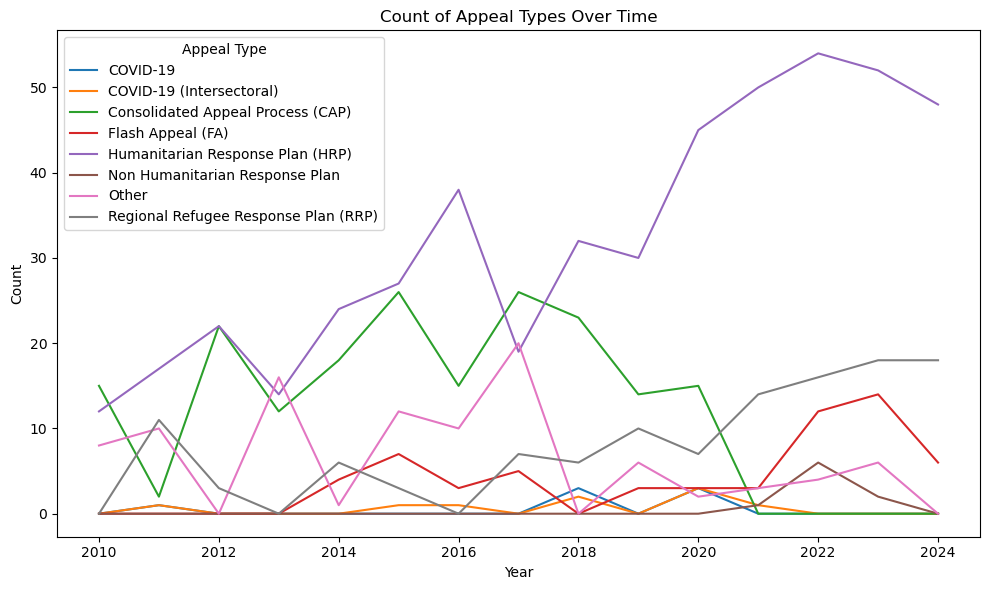

In [152]:
#Pivot table to show the counts of each Appeal Type Column per year
pivot_df = appeal_counts.pivot(index='Year', columns='Modified Appeal Type', values='Count').fillna(0)

# Plot line graph
pivot_df.plot(kind='line', figsize=(10, 6))
plt.title('Count of Appeal Types Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Appeal Type')
plt.tight_layout()
plt.show()

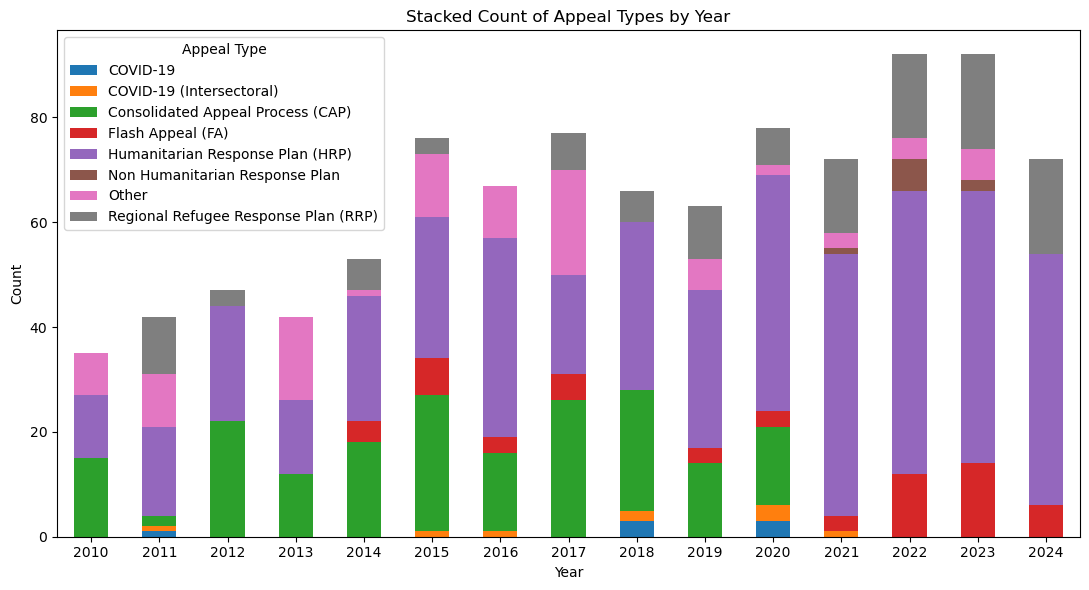

In [153]:
#stacked bar chart that shows the amount of each appeal type in the total appeal type count per year.
pivot_df.plot(kind='bar', stacked=True, figsize=(11, 6))
plt.title('Stacked Count of Appeal Types by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Appeal Type')
plt.tight_layout()
plt.show()

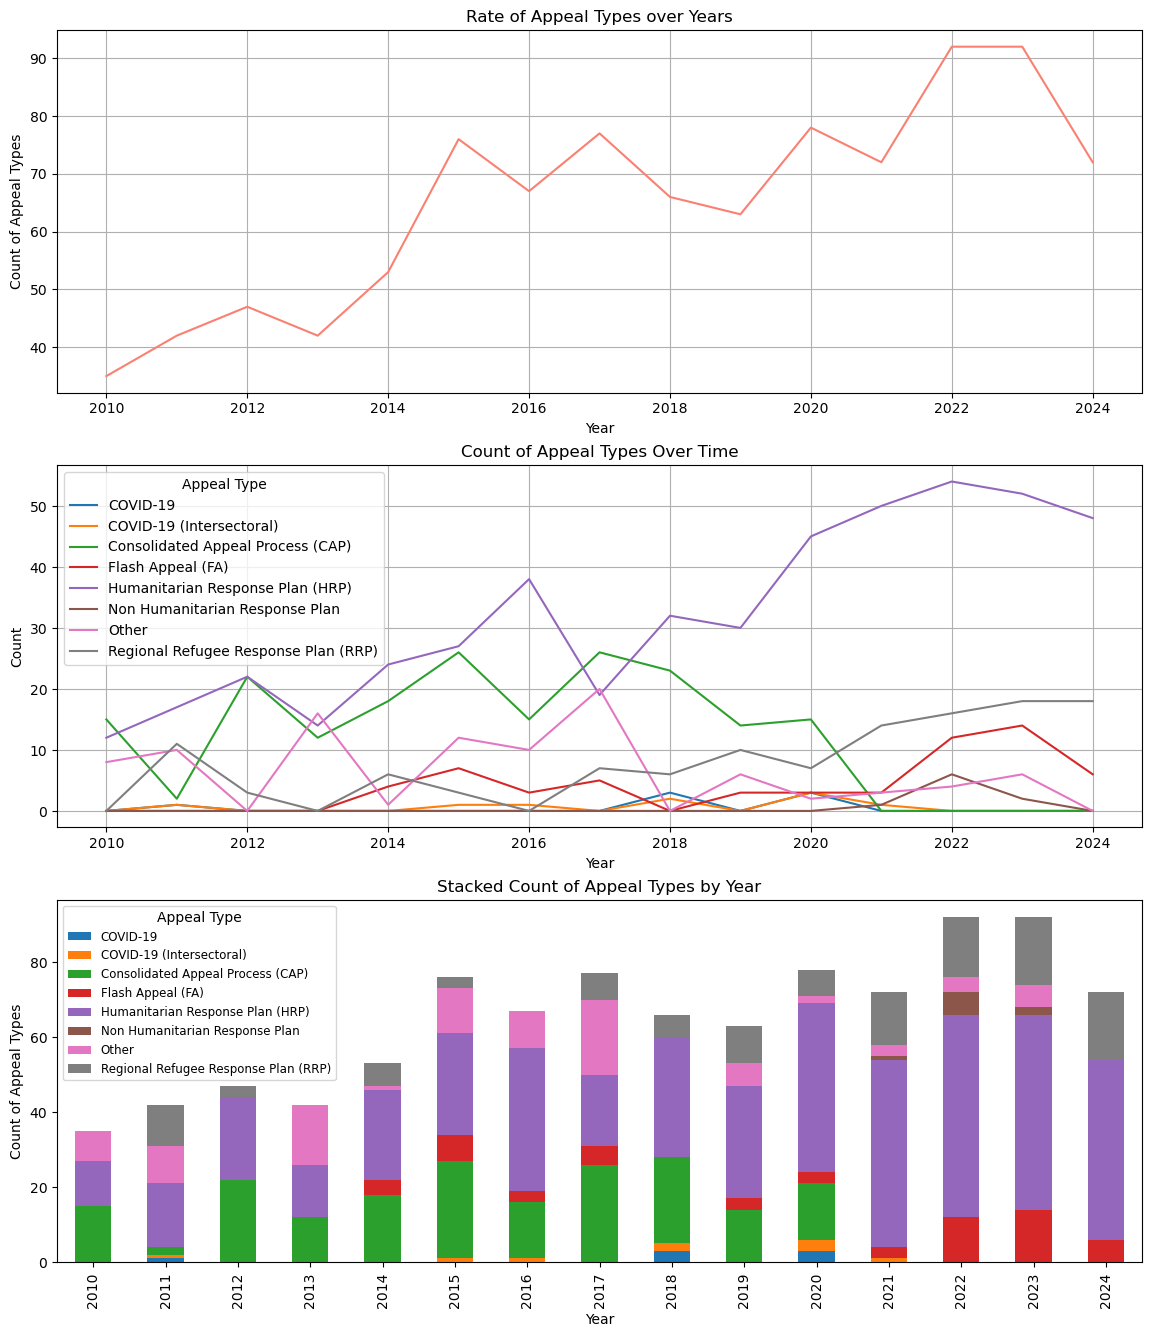

In [262]:
#Combing graphs vertically

fig, axes = plt.subplots(3, 1, figsize=(14, 16))

appeal_type_counts_year.plot.line(ax=axes[0],
                                   x= "year", color = "salmon", xlabel = "Year",
                                   ylabel = 'Count of Appeal Types',
                                   title = 'Rate of Appeal Types over Years',
                                   grid = True)

pivot_df.plot(ax=axes[1],kind='line', title = 'Count of Appeal Types Over Time',
            ylabel = 'Count', xlabel = "Year", grid = True)
axes[1].legend(title='Appeal Type', fontsize= 10)

pivot_df.plot(ax=axes[2], kind='bar', stacked=True,title = 'Stacked Count of Appeal Types by Year',
              ylabel = 'Count of Appeal Types', xlabel = "Year")
axes[2].legend(title='Appeal Type', fontsize= 8.5)

**Reflection - Relationship Between Appeal Types and Time**

Overall, the rate of appeal types has increased between 2010 and 2024. The year with the most appeal types shown appeared in 2022 and 2023 with 92 appeal types total. The year 2010 had the lowest number of appeal types with 32.

In [154]:
#The count of each appeal type  

appeal_counts_total = human_needs.groupby(by = "Modified Appeal Type")
appeal_counts_total = appeal_counts_total["Modified Appeal Type"].value_counts().to_frame('Count').reset_index().rename(columns={'index': 'Value'})
appeal_counts_total

,Modified Appeal Type,Count
0,COVID-19,7
1,COVID-19 (Intersectoral),9
2,Consolidated Appeal Process (CAP),188
3,Flash Appeal (FA),60
4,Humanitarian Response Plan (HRP),484
5,Non Humanitarian Response Plan,9
6,Other,98
7,Regional Refugee Response Plan (RRP),119


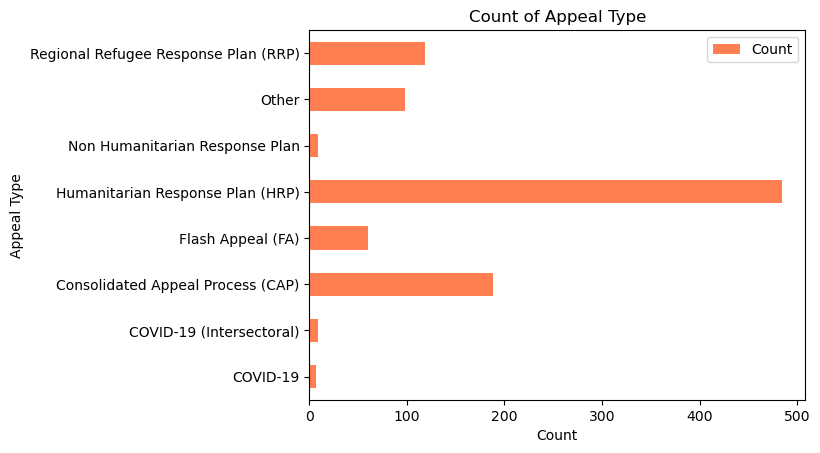

In [155]:
#creating a bar graph to show count of Appeal Type
appeal_counts_total.plot.barh(x="Modified Appeal Type", y="Count", color = "coral")
plt.ylabel("Appeal Type")
plt.xlabel("Count")
plt.title('Count of Appeal Type')
plt.show()

**Reflection - Comparison Between Appeal Types**

The Humanitarian Response Plan HRP is the plan that has the highest frequency with the count being 484. The next highest was Consolidated Appeal Process (CAP) with the count being 185. The lowest frequency is COVID 19. 

In [156]:
human_needs = human_needs.dropna()
human_needs.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,Modified Appeal Type
0,2010,Afghanistan,Afghanistan,AFG,People targeted,7800000,Afghanistan,consolidated appeal process (cap),Consolidated Appeal Process (CAP)
1,2010,Afghanistan,Afghanistan,AFG,Funding received,223824925,Afghanistan,consolidated appeal process (cap),Consolidated Appeal Process (CAP)
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,448551322,Afghanistan,consolidated appeal process (cap),Consolidated Appeal Process (CAP)
3,2010,Afghanistan,Afghanistan,AFG,People targeted,5400000,Afghanistan,consolidated appeal process (cap),Consolidated Appeal Process (CAP)
4,2010,Afghanistan,Afghanistan,AFG,Funding received,345246607,Afghanistan,consolidated appeal process (cap),Consolidated Appeal Process (CAP)


In [157]:
#Using a pivot table to divide the metrics into columns 
human_needs["Metric"] = human_needs["Metric"].astype(str)
metrics_df = human_needs.pivot_table(index=["Modified Appeal Type","Year"], columns="Metric", values="Value").round(2)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
metrics_df

#This pivot table shows the metrics for each appeal type, and the year. Some appeal types have null values for the funding received.
#Some have more values than other based on the years. How do I go about finding the appeal types with the most funding?

/var/folders/q6/zhddk2010yzdxh2b2q3wtwdw0000gp/T/ipykernel_64200/2062313070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_needs["Metric"] = human_needs["Metric"].astype(str)


Metric                                     Funding received  \
Modified Appeal Type                 Year                     
COVID-19                             2011               NaN   
                                     2018               NaN   
                                     2020               NaN   
COVID-19 (Intersectoral)             2011               NaN   
                                     2015               NaN   
                                     2016               NaN   
                                     2018               NaN   
                                     2020               NaN   
                                     2021               NaN   
Consolidated Appeal Process (CAP)    2010         277141370   
                                     2011               NaN   
                                     2012         201520954   
                                     2013         459061844   
                                     2014         103437105   
                                     2015         250721799   
                                     2016         226919264   
                                     2017         298638159   
                                     2018         748022431   
                                     2019         341480294   
                                     2020         251941091   
Flash Appeal (FA)                    2014          38360307   
                                     2015         470511252   
                                     2016           3831896   
                                     2017         514174224   
                                     2019          27913268   
                                     2020               NaN   
                                     2021         233300000   
                                     2022               NaN   
                                     2023               NaN   
                                     2024               NaN   
Humanitarian Response Plan (HRP)     2010         384900000   
                                     2011          72900000   
                                     2012         205540000   
                                     2013         356000000   
                                     2014         254633333   
                                     2015         276487500   
                                     2016         213345455   
                                     2017         236040000   
                                     2018         797633333   
                                     2019         582485714   
                                     2020         919137500   
                                     2021        1035533333   
                                     2022               NaN   
                                     2023               NaN   
                                     2024               NaN   
Non Humanitarian Response Plan       2021               NaN   
                                     2022               NaN   
                                     2023               NaN   
Other                                2010         481700000   
                                     2011          44098858   
                                     2013          42729346   
                                     2014          32000000   
                                     2015          65452769   
                                     2016          64238303   
                                     2017          81224543   
                                     2019          76494116   
                                     2020          99533300   
                                     2021         382600000   
                                     2022               NaN   
                                     2023               NaN   
Regional Refugee Response Plan (RRP) 2011         102875000   
                               

In [ ]:
#average metrics of the appeal types 
#Funding 

avg_metrics = metrics_df.groupby(by = "Modified Appeal Type").agg('mean')
avg_funding_received = avg_metrics.sort_values(by = "Funding received", ascending= False).dropna(subset="Funding received")
avg_funding_received




Metric,Funding received,Funding requirements,People in need,People targeted
Modified Appeal Type,,,,
Regional Refugee Response Plan (RRP),575231098,1638478655,3236313,5300000
Humanitarian Response Plan (HRP),444553014,851225226,6707630,NaN
Consolidated Appeal Process (CAP),315888431,460753561,NaN,4008384
Flash Appeal (FA),214681824,411141244,2750589,NaN
Other,137007124,399621770,5429423,1700000


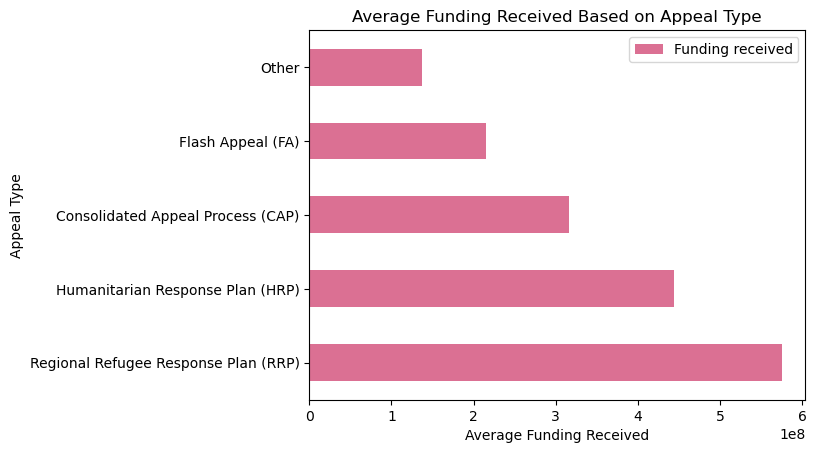

In [159]:
avg_funding_received.plot.barh(y="Funding received", color = "palevioletred")
plt.xlabel("Average Funding Received")
plt.ylabel("Appeal Type")
plt.title('Average Funding Received Based on Appeal Type')
plt.show()

In [160]:
#sum metrics of the appeal types 
#Funding 
#Reasing why there a are zeros is because the sum on the NAN values is 0
sum_metrics = metrics_df.groupby(by = "Modified Appeal Type").agg('sum')
sum_funding_received = sum_metrics.sort_values(by = "Funding received", ascending= False)
sum_funding_received


Metric,Funding received,Funding requirements,People in need,People targeted
Modified Appeal Type,,,,
Humanitarian Response Plan (HRP),5334636169,12768378383,100614447,0
Regional Refugee Response Plan (RRP),4601848788,14746307897,38835756,5300000
Consolidated Appeal Process (CAP),3158884311,5068289175,0,44092225
Other,1370071235,4395839466,48864806,1700000
Flash Appeal (FA),1288090947,3700271196,11002355,0
COVID-19,0,0,36250000,0
COVID-19 (Intersectoral),0,0,56530000,0
Non Humanitarian Response Plan,0,125292908,8607046,0


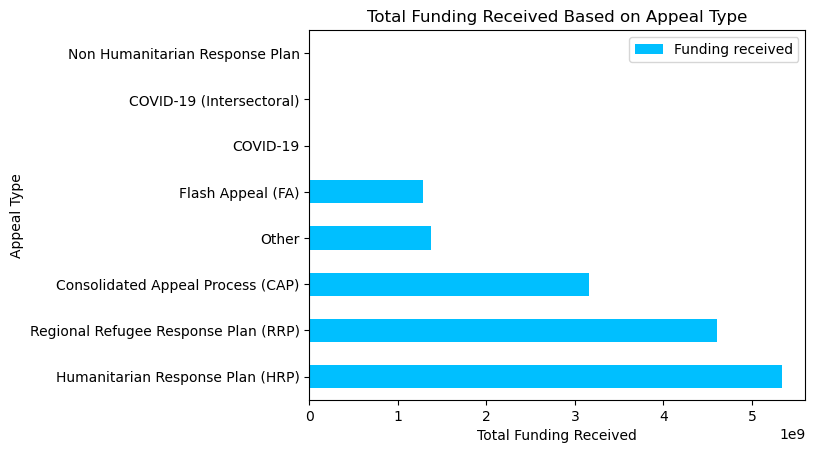

In [161]:
sum_funding_received.plot.barh(y="Funding received", color = "deepskyblue")
plt.xlabel("Total Funding Received")
plt.ylabel("Appeal Type")
plt.title('Total Funding Received Based on Appeal Type')
plt.show()

In [162]:
#Average Funding Requirements
avg_funding_required = avg_metrics.sort_values(by = "Funding requirements", ascending= False).dropna(subset="Funding requirements")
avg_funding_required

Metric,Funding received,Funding requirements,People in need,People targeted
Modified Appeal Type,,,,
Regional Refugee Response Plan (RRP),575231098,1638478655,3236313,5300000
Humanitarian Response Plan (HRP),444553014,851225226,6707630,NaN
Consolidated Appeal Process (CAP),315888431,460753561,NaN,4008384
Flash Appeal (FA),214681824,411141244,2750589,NaN
Other,137007124,399621770,5429423,1700000
Non Humanitarian Response Plan,NaN,62646454,2869015,NaN


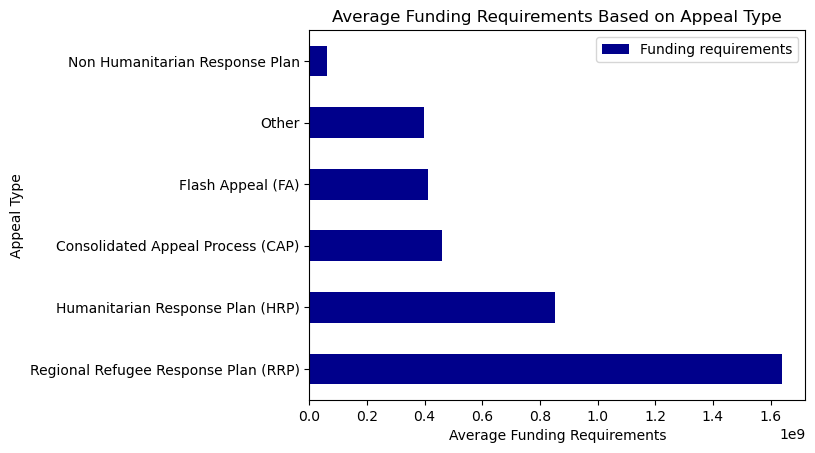

In [267]:
avg_funding_required.plot.barh(y="Funding requirements", color = "darkblue")
plt.xlabel("Average Funding Requirements")
plt.ylabel("Appeal Type")
plt.title('Average Funding Requirements Based on Appeal Type')
plt.show()

In [263]:
sum_funding_required = sum_metrics.sort_values(by = "Funding requirements", ascending= False).dropna(subset="Funding requirements")
sum_funding_required

Metric,Funding received,Funding requirements,People in need,People targeted
Modified Appeal Type,,,,
Regional Refugee Response Plan (RRP),4601848788,14746307897,38835756,5300000
Humanitarian Response Plan (HRP),5334636169,12768378383,100614447,0
Consolidated Appeal Process (CAP),3158884311,5068289175,0,44092225
Other,1370071235,4395839466,48864806,1700000
Flash Appeal (FA),1288090947,3700271196,11002355,0
Non Humanitarian Response Plan,0,125292908,8607046,0
COVID-19,0,0,36250000,0
COVID-19 (Intersectoral),0,0,56530000,0


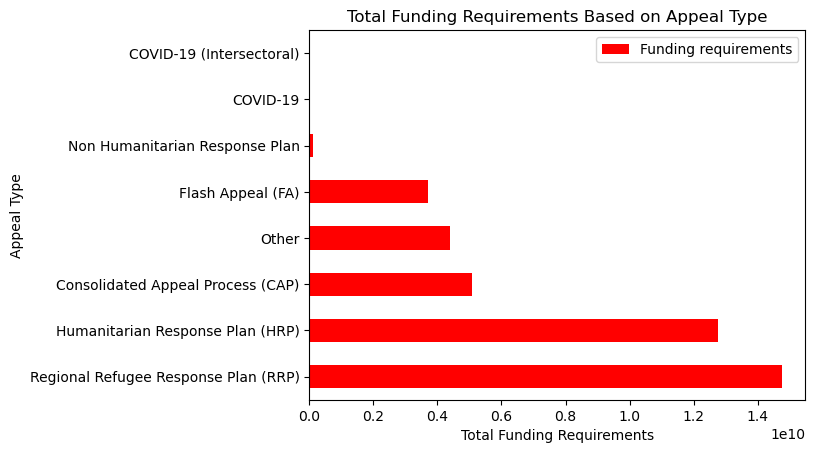

In [272]:
sum_funding_required.plot.barh(y="Funding requirements", color = "red")
plt.xlabel("Total Funding Requirements")
plt.ylabel("Appeal Type")
plt.title('Total Funding Requirements Based on Appeal Type')
plt.show()

# Analysis 



**What types of humanitarian plans exist?**

There are 8 appeal type plans: 

* Flash Appeal (FA)
* COVID-19 (Intersectoral)
* COVID-19
* Consolidated Appeal Process (CAP)
* Non Humanitarian Response Plan
* Humanitarian Response Plan (HRP)
* Other
* Regional Refugee Response Plan (RRP)


The Humanitarian Response Plan HRP is the plan that has the highest frequency with the count being 484. The next highest was Consolidated Appeal Process (CAP) with the count being 185. The lowest frequency is COVID 19. 

Overall, the rate of appeal types has increased between 2010 and 2024. The year with the most appeal types shown appeared in 2022 and 2023 with 92 appeal types total. The year 2010 had the lowest amount of appeal types with 32.




**Which appeal types receive the most funding on average?**

Regional Refugee Response Plan (RRP) receive the most funding on average $575,231,098 dollars which is interesting considering that the Regional Refugee Response Plan (RRP) are the third most popular appeal type. 

**Which appeal types receive the most funding in total?**

Humanitarian Response Plan (HRP) received the most funding with a total of $ 5,334,636,169. 

**Which appeal types requires the most funding on average?**

The Regional Refugee Response Plan (RRP) has the highest funding requirements $1,638,478,655 out of the other appeal types on average and in total. 